# Flight delay prediction-Boosting (Gradient Boosting + AdaBoost)

## Data Preparation

In [ ]:
# prepare package for reading .pkl
# package importation
# !pip install xgboost
# !pip install imblearn
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from joblib import parallel_backend
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# read in data
train_test_df = pd.read_pickle('Train_Test_Data_Airport_Flight_Delays.pkl')

In [ ]:
# Data Extraction
train_test_y = train_test_df['DEP_DEL15']
train_test_X = train_test_df[['AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 'LATITUDE', 'LONGITUDE', 'CARRIER_NAME_INT', 'MONTH', 'SNOW', 'SNWD', 'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'DAY_OF_WEEK', 'PRCP', 'TMAX', 'AWND', 'SEGMENT_NUMBER', 'DISTANCE_GROUP', 'CONCURRENT_FLIGHTS', 'PLANE_AGE']]

In [ ]:
# split train and test datasets
X_train, X_test, y_train, y_test= train_test_split(train_test_X,train_test_y,test_size = 0.3, stratify=train_test_y, random_state=22)

## Gradient Boosting

In [ ]:
# Gradient Boost
gradboost = GradientBoostingClassifier(random_state = 22)

In [ ]:
param_grid = {
    'classifier__max_depth': [1, 3, 5, 7],  
    'classifier__learning_rate' : [0.01, 0.05, 0.1, 0.2, 1],
    'classifier__n_estimators' : [50, 100, 200, 500]
} 

In [ ]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 22)

In [ ]:
# SMOTE
pipeline1 = imbpipeline(steps = [['smote', SMOTE(random_state=22)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', gradboost]])

In [ ]:
grid = GridSearchCV(pipeline1,      
                    param_grid=param_grid, 
                    scoring = 'f1',
                    cv = kfold)

In [ ]:
%%time
with parallel_backend('multiprocessing'):
    grid.fit(X_train, y_train)

Wall time: 58min 10s


In [ ]:
results = pd.DataFrame(grid.cv_results_)
results.sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
28,27.702133,0.208732,0.085772,0.003338,0.05,7,50,"{'classifier__learning_rate': 0.05, 'classifie...",0.490992,0.496764,0.489432,0.490874,0.478134,0.489239,0.006095,1
14,109.440195,0.835873,0.269878,0.012609,0.01,7,200,"{'classifier__learning_rate': 0.01, 'classifie...",0.491906,0.491674,0.487953,0.488049,0.477093,0.487335,0.005395,2
44,28.133780,0.077159,0.079188,0.003254,0.1,7,50,"{'classifier__learning_rate': 0.1, 'classifier...",0.491689,0.495614,0.480816,0.487905,0.480131,0.487231,0.006036,3
15,280.530584,1.583096,0.606778,0.115129,0.01,7,500,"{'classifier__learning_rate': 0.01, 'classifie...",0.491749,0.493450,0.484232,0.489135,0.476993,0.487112,0.005941,4
45,56.351935,0.355268,0.124268,0.005871,0.1,7,100,"{'classifier__learning_rate': 0.1, 'classifier...",0.482085,0.496000,0.480782,0.488407,0.480547,0.485564,0.005952,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,13.858148,0.443275,0.055053,0.001595,0.01,3,50,"{'classifier__learning_rate': 0.01, 'classifie...",0.389847,0.391895,0.467506,0.419545,0.385724,0.410904,0.030716,76
79,203.007146,21.009503,0.329924,0.125050,1,7,500,"{'classifier__learning_rate': 1, 'classifier__...",0.393824,0.417166,0.415173,0.415445,0.410120,0.410346,0.008589,77
2,23.440529,0.886923,0.081782,0.014724,0.01,1,200,"{'classifier__learning_rate': 0.01, 'classifie...",0.398768,0.410464,0.404045,0.389496,0.393819,0.399318,0.007397,78
1,12.107230,1.830889,0.057846,0.003025,0.01,1,100,"{'classifier__learning_rate': 0.01, 'classifie...",0.393497,0.380268,0.387691,0.370588,0.373307,0.381070,0.008591,79


In [ ]:
grid.best_params_

{'classifier__learning_rate': 0.05,
 'classifier__max_depth': 7,
 'classifier__n_estimators': 50}

In [ ]:
#running with the model selected from grid search
gradboost = GradientBoostingClassifier(
    n_estimators = grid.best_params_['classifier__n_estimators'],   
    learning_rate = grid.best_params_['classifier__learning_rate'],  
    max_depth = grid.best_params_['classifier__max_depth'],        
    random_state=22 
)

pipeline1 = imbpipeline(steps = [['smote', SMOTE(random_state=22)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', gradboost]])

In [ ]:
%%time
with parallel_backend('multiprocessing'):
    pipeline1.fit(X_train, y_train)

Wall time: 9.13 s


In [ ]:
%%time
cv_results1 = cross_validate(pipeline1, X_train, y_train, 
                            scoring = ['precision', 'recall', 'f1'], 
                            cv = kfold,
                            return_estimator = True,
                           )

cv_results1 = pd.DataFrame(cv_results1)
cv_results1

Wall time: 35.7 s


,fit_time,score_time,estimator,test_precision,test_recall,test_f1
0,6.984358,0.031882,"(SMOTE(random_state=22), MinMaxScaler(), ([Dec...",0.419344,0.592168,0.490992
1,6.932545,0.033829,"(SMOTE(random_state=22), MinMaxScaler(), ([Dec...",0.412844,0.623507,0.496764
2,7.530904,0.033910,"(SMOTE(random_state=22), MinMaxScaler(), ([Dec...",0.411880,0.602962,0.489432
3,7.094996,0.032945,"(SMOTE(random_state=22), MinMaxScaler(), ([Dec...",0.413613,0.603629,0.490874
4,6.972322,0.032912,"(SMOTE(random_state=22), MinMaxScaler(), ([Dec...",0.403147,0.587393,0.478134


In [ ]:
%%time
r = permutation_importance(pipeline1, X_train, y_train,
                               n_repeats=30,
                               random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_train.columns.tolist()[i]:<8}"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")

SEGMENT_NUMBER0.065 +/- 0.001
PRCP    0.053 +/- 0.002
TMAX    0.030 +/- 0.001
MONTH   0.029 +/- 0.001
AIRLINE_AIRPORT_FLIGHTS_MONTH0.021 +/- 0.001
DAY_OF_WEEK0.018 +/- 0.001
AWND    0.016 +/- 0.001
CONCURRENT_FLIGHTS0.014 +/- 0.001
SNOW    0.007 +/- 0.000
SNWD    0.004 +/- 0.000
PLANE_AGE0.004 +/- 0.001
DISTANCE_GROUP0.004 +/- 0.001
Wall time: 1min 7s


In [ ]:
y_pred1 = pipeline1.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred1, labels=[True, False]))

              precision    recall  f1-score   support

        True       0.41      0.61      0.49      4486
       False       0.83      0.68      0.74     12420

    accuracy                           0.66     16906
   macro avg       0.62      0.65      0.62     16906
weighted avg       0.72      0.66      0.68     16906



[[0.16313735 0.10221223]
 [0.23808115 0.49656927]]


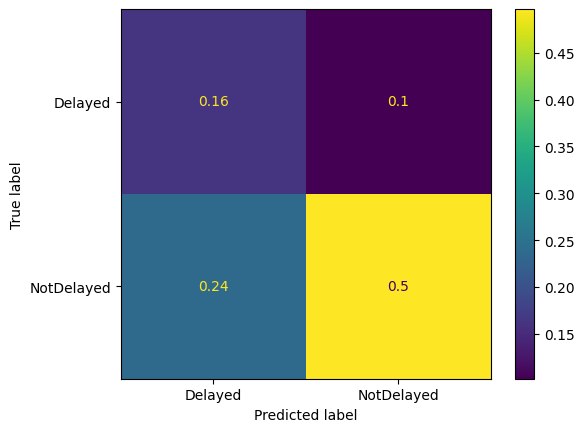

In [ ]:
labels = ['Delayed', 'NotDelayed']
cm = confusion_matrix(y_test, y_pred1,labels=[1,0], normalize='all')
print(cm)
cmd = ConfusionMatrixDisplay(cm,display_labels=['Delayed','NotDelayed'])
cmd.plot()

In [ ]:
scores1 = pipeline1.decision_function(X_test)

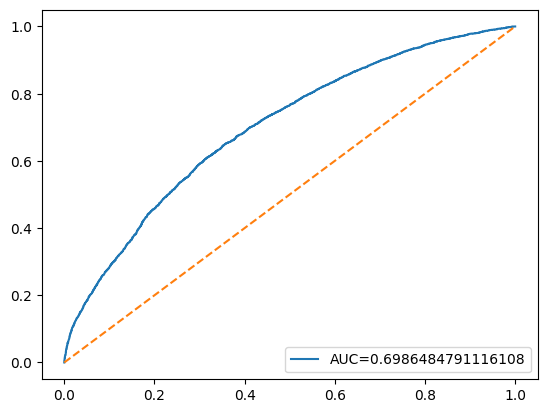

In [ ]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, scores1, pos_label = True)
roc_auc_score1 = roc_auc_score(y_test, scores1)
plt.plot(fpr1, tpr1, label="AUC="+str(roc_auc_score1))
plt.legend(loc="lower right")
plt.plot([0,1], [0,1], linestyle = 'dashed')

## AdaBoost

In [ ]:
# Adaboost
adaboost = AdaBoostClassifier(random_state = 22)

In [ ]:
param_grid2 = {  
    'classifier__learning_rate' : [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1],
    'classifier__n_estimators' : [50, 100, 200, 500, 800, 1000]
} 

pipeline2 = imbpipeline(steps = [['smote', SMOTE(random_state=22)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', adaboost]])

grid2 = GridSearchCV(pipeline2,      
                    param_grid2, 
                    scoring = 'f1',
                    cv = kfold,
                   )

In [ ]:
%%time
with parallel_backend('multiprocessing'):
    grid2.fit(X_train, y_train)
# grid.fit(X_train, y_train, sample_weight = sample_weight_train) # <-- pass the sample weights here

Wall time: 32min 34s


In [ ]:
results = pd.DataFrame(grid.cv_results_)
results.sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
28,27.702133,0.208732,0.085772,0.003338,0.05,7,50,"{'classifier__learning_rate': 0.05, 'classifie...",0.490992,0.496764,0.489432,0.490874,0.478134,0.489239,0.006095,1
14,109.440195,0.835873,0.269878,0.012609,0.01,7,200,"{'classifier__learning_rate': 0.01, 'classifie...",0.491906,0.491674,0.487953,0.488049,0.477093,0.487335,0.005395,2
44,28.133780,0.077159,0.079188,0.003254,0.1,7,50,"{'classifier__learning_rate': 0.1, 'classifier...",0.491689,0.495614,0.480816,0.487905,0.480131,0.487231,0.006036,3
15,280.530584,1.583096,0.606778,0.115129,0.01,7,500,"{'classifier__learning_rate': 0.01, 'classifie...",0.491749,0.493450,0.484232,0.489135,0.476993,0.487112,0.005941,4
45,56.351935,0.355268,0.124268,0.005871,0.1,7,100,"{'classifier__learning_rate': 0.1, 'classifier...",0.482085,0.496000,0.480782,0.488407,0.480547,0.485564,0.005952,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,13.858148,0.443275,0.055053,0.001595,0.01,3,50,"{'classifier__learning_rate': 0.01, 'classifie...",0.389847,0.391895,0.467506,0.419545,0.385724,0.410904,0.030716,76
79,203.007146,21.009503,0.329924,0.125050,1,7,500,"{'classifier__learning_rate': 1, 'classifier__...",0.393824,0.417166,0.415173,0.415445,0.410120,0.410346,0.008589,77
2,23.440529,0.886923,0.081782,0.014724,0.01,1,200,"{'classifier__learning_rate': 0.01, 'classifie...",0.398768,0.410464,0.404045,0.389496,0.393819,0.399318,0.007397,78
1,12.107230,1.830889,0.057846,0.003025,0.01,1,100,"{'classifier__learning_rate': 0.01, 'classifie...",0.393497,0.380268,0.387691,0.370588,0.373307,0.381070,0.008591,79


In [ ]:
grid2.best_params_

{'classifier__learning_rate': 0.2, 'classifier__n_estimators': 800}

In [ ]:
%%time
#running with the model selected from grid search
adaboost = GradientBoostingClassifier(
    n_estimators = grid2.best_params_['classifier__n_estimators'],   
    learning_rate = grid2.best_params_['classifier__learning_rate'],         
    random_state= 22
)  

pipeline2 = imbpipeline(steps = [['smote', SMOTE(random_state=22)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', adaboost]])

with parallel_backend('multiprocessing'):
    pipeline2.fit(X_train, y_train)

cv_results = cross_validate(pipeline2, X_train, y_train, 
                            scoring = ['precision', 'recall', 'f1'], 
                            cv = kfold, 
                            return_estimator = True,
                           )

cv_results = pd.DataFrame(cv_results)
cv_results

Wall time: 5min 5s


,fit_time,score_time,estimator,test_precision,test_recall,test_f1
0,51.049477,0.092754,"(SMOTE(random_state=22), MinMaxScaler(), ([Dec...",0.447708,0.480420,0.463488
1,49.416876,0.091755,"(SMOTE(random_state=22), MinMaxScaler(), ([Dec...",0.455756,0.506928,0.479982
2,47.749335,0.092752,"(SMOTE(random_state=22), MinMaxScaler(), ([Dec...",0.451343,0.489728,0.469753
3,47.329456,0.116690,"(SMOTE(random_state=22), MinMaxScaler(), ([Dec...",0.453863,0.490926,0.471668
4,47.949808,0.092784,"(SMOTE(random_state=22), MinMaxScaler(), ([Dec...",0.448808,0.485673,0.466514


In [ ]:
%%time
r = permutation_importance(pipeline2, X_train, y_train,
                               n_repeats=30,
                               random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_train.columns.tolist()[i]:<8}"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")

SEGMENT_NUMBER0.045 +/- 0.002
TMAX    0.035 +/- 0.002
PRCP    0.034 +/- 0.001
AWND    0.021 +/- 0.001
CONCURRENT_FLIGHTS0.020 +/- 0.001
MONTH   0.016 +/- 0.001
PLANE_AGE0.011 +/- 0.001
AIRLINE_AIRPORT_FLIGHTS_MONTH0.011 +/- 0.001
DAY_OF_WEEK0.008 +/- 0.001
DISTANCE_GROUP0.008 +/- 0.001
SNOW    0.004 +/- 0.001
SNWD    0.002 +/- 0.001
Wall time: 4min 29s


In [ ]:
y_pred2 = pipeline2.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred2, labels=[True, False]))

              precision    recall  f1-score   support

        True       0.45      0.51      0.48      4486
       False       0.81      0.77      0.79     12420

    accuracy                           0.70     16906
   macro avg       0.63      0.64      0.64     16906
weighted avg       0.72      0.70      0.71     16906



[[0.13634213 0.12900745]
 [0.16698214 0.56766828]]


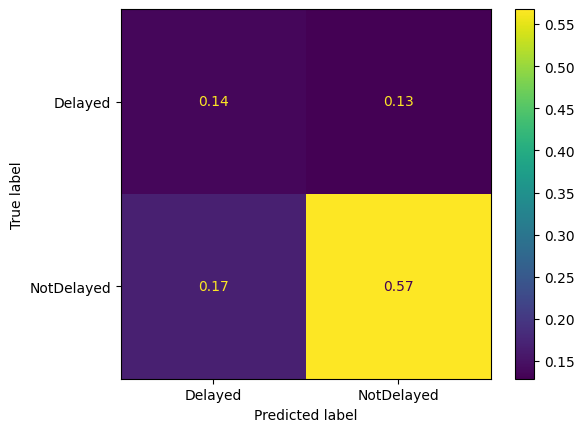

In [ ]:
labels = ['Delayed', 'NotDelayed']
cm = confusion_matrix(y_test, y_pred2,labels=[1,0],normalize='all')
print(cm)
cmd = ConfusionMatrixDisplay(cm,display_labels=['Delayed','NotDelayed'])
cmd.plot()

In [ ]:
scores2 = pipeline2.decision_function(X_test)

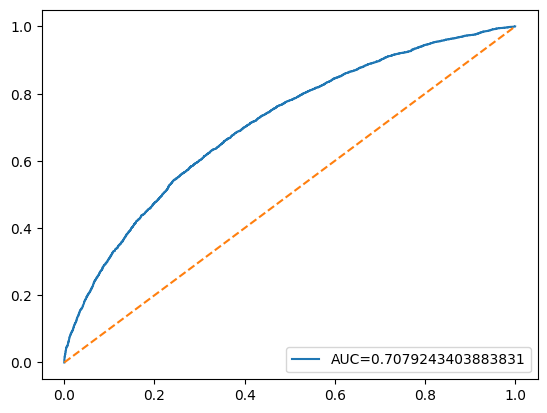

In [ ]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, scores2, pos_label = True)
roc_auc_score2 = roc_auc_score(y_test, scores2)
plt.plot(fpr2, tpr2, label="AUC="+str(roc_auc_score2))
plt.legend(loc="lower right")
plt.plot([0,1], [0,1], linestyle = 'dashed')

## Expected Value Evaluation

In [ ]:
cost_benefit_matrix = np.array([[-50, -500], [-100, 100]])
cost_benefit_matrix

In [ ]:
conf_mat_grad = confusion_matrix(y_test, y_pred1, 
                                  labels = [1, 0],  # You should set labels so you know what the rows & cols represent
                                  normalize = 'all' # Set this to 'all' to divide the confusion matrix by total (all samples)
                                 )
conf_mat_grad

In [ ]:
ev1 = (conf_mat_grad * cost_benefit_matrix).sum()
ev1

ev1 == -33.41

In [ ]:
conf_mat_ada = confusion_matrix(y_test, y_pred2, 
                                  labels = [1, 0],  # You should set labels so you know what the rows & cols represent
                                  normalize = 'all' # Set this to 'all' to divide the confusion matrix by total (all samples)
                                 )
conf_mat_ada

In [ ]:
ev2 = (conf_mat_ada * cost_benefit_matrix).sum()
ev2

ev2 == -31.25

In [ ]:
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(recall_score(y_test, y_pred1))
print(f1_score(y_test, y_pred1))

In [ ]:
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(recall_score(y_test, y_pred2))
print(f1_score(y_test, y_pred2))